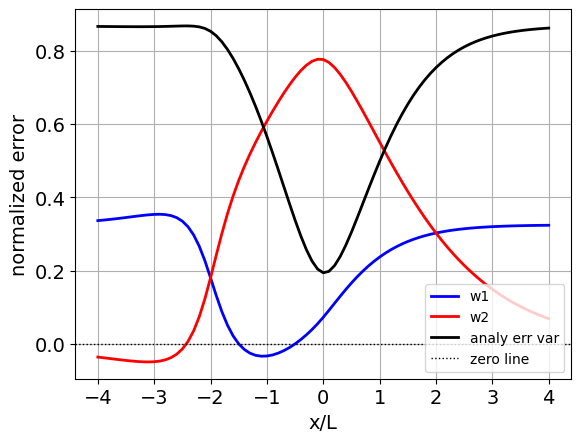

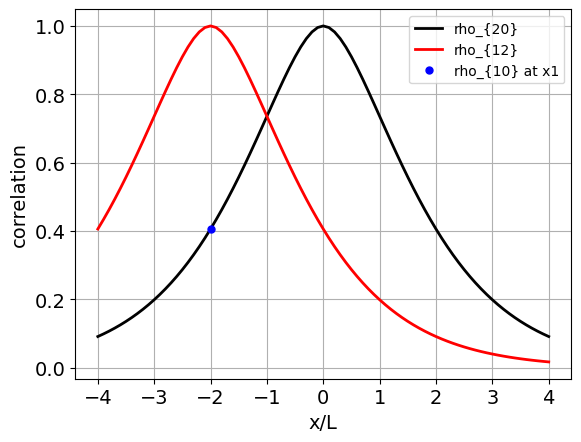

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
x1 = -2.0  # position of obs 1
x0 = 0.0   # position of analysis point
x = np.arange(-4.0, 4.1, 0.1)  # x-grid
x2 = x  # position of obs 2
alfa = 0.25  # alfa = var(obs err)/var(bkgd err)

# Preliminary calculations
alfp1 = 1.0 + alfa
alfp1sq = alfp1**2
d10 = np.abs(x1 - x0)  # normalized distance between points 1 and 0
d12 = np.abs(x1 - x2)  # normalized distance between points 1 and 2
d20 = np.abs(x2 - x0)  # normalized distance between points 2 and 0

# Calculate error correlations of background at obs 1 and obs 2 locations
rho10 = (1 + d10) * np.exp(-d10)
rho20 = (1 + d20) * np.exp(-d20)
rho12 = (1 + d12) * np.exp(-d12)

# Calculate weights for obs 1 and obs 2
w1a = rho10 * alfp1 - rho12 * rho20
w2a = rho20 * alfp1 - rho12 * rho10
denom = alfp1sq - rho12 * rho12
w1 = w1a / denom
w2 = w2a / denom

# Now calculate the analysis error variance normalized by the background error variance
tmp = (alfp1 * (rho10**2 + (rho20**2)) - 2 * rho10 * rho20 * rho12) / denom
epssq = 1 - tmp

# Plot results
plt.figure(1)
plt.plot(x, w1, 'b-', linewidth=2, label='w1')
plt.plot(x, w2, 'r-', linewidth=2, label='w2')
plt.plot(x, epssq, 'k-', linewidth=2, label='analy err var')
plt.xlabel('x/L', fontsize=14)
plt.ylabel('normalized error', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axhline(0, color='black', linestyle=':', linewidth=1, label='zero line')
plt.legend()
plt.grid(True)

plt.figure(2)
plt.plot(x, rho20, 'k-', linewidth=2, label='rho_{20}')
plt.plot(x, rho12, 'r-', linewidth=2, label='rho_{12}')
plt.plot(x1, rho10, 'b.', markersize=10, label='rho_{10} at x1')
plt.xlabel('x/L', fontsize=14)
plt.ylabel('correlation', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.grid(True)

plt.show()


In [21]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider, Layout, HBox, Label, VBox, RadioButtons
import ipywidgets as widgets

In [22]:
def all(
        x1
        ):

        # Define parameters
        #x1 = -2.0  # position of obs 1
        x0 = 0.0   # position of analysis point
        x = np.arange(-4.0, 4.1, 0.1)  # x-grid
        x2 = x  # position of obs 2
        alfa = 0.25  # alfa = var(obs err)/var(bkgd err)

        # Preliminary calculations
        alfp1 = 1.0 + alfa
        alfp1sq = alfp1**2
        d10 = np.abs(x1 - x0)  # normalized distance between points 1 and 0
        d12 = np.abs(x1 - x2)  # normalized distance between points 1 and 2
        d20 = np.abs(x2 - x0)  # normalized distance between points 2 and 0

        # Calculate error correlations of background at obs 1 and obs 2 locations
        rho10 = (1 + d10) * np.exp(-d10)
        rho20 = (1 + d20) * np.exp(-d20)
        rho12 = (1 + d12) * np.exp(-d12)

        # Calculate weights for obs 1 and obs 2
        w1a = rho10 * alfp1 - rho12 * rho20
        w2a = rho20 * alfp1 - rho12 * rho10
        denom = alfp1sq - rho12 * rho12
        w1 = w1a / denom
        w2 = w2a / denom

        # Now calculate the analysis error variance normalized by the background error variance
        tmp = (alfp1 * (rho10**2 + (rho20**2)) - 2 * rho10 * rho20 * rho12) / denom
        epssq = 1 - tmp

        # Plot results
        layout = [
        ["A", "A", "B","B"],
        ]   
        fig, axd = plt.subplot_mosaic(layout, figsize=(20,2.5))

        axd['A'].plot(x, w1, 'b-', linewidth=2, label='w1')
        axd['A'].plot(x, w2, 'r-', linewidth=2, label='w2')
        axd['A'].plot(x, epssq, 'k-', linewidth=2, label='analy err var')
        axd['A'].set_xlabel('x/L', fontsize=14)
        axd['A'].set_ylabel('normalized error', fontsize=14)
        axd['A'].axhline(0, color='black', linestyle=':', linewidth=2, label='zero line')
        axd['A'].legend()
        axd['A'].grid(lw=0.3)

        axd['B'].plot(x, rho20, 'k-', linewidth=2, label='$rho_{20}$')
        axd['B'].plot(x, rho12, 'r-', linewidth=2, label='$rho_{12}$')
        axd['B'].plot(x1, rho10, 'b.', markersize=20, label='$rho_{10}$ at x1')
        axd['B'].set_xlabel('x/L', fontsize=14)
        axd['B'].set_ylabel('correlation', fontsize=14)
        axd['B'].legend()
        axd['B'].grid(lw=0.3)

        plt.show()

x1 = FloatSlider(min=-4, max=4, step=0.1, value=-2, description='Position of Obs 1 ',readout_format='.2f',
           layout=Layout(width='50%', height='20px'), style = {'description_width': '250px'})


x = interactive(all, x1=x1)
# output = x.children[-1]
# output.layout.height = '750px'
display(x)


interactive(children=(FloatSlider(value=-2.0, description='Position of Obs 1 ', layout=Layout(height='20px', w…